<a href="https://colab.research.google.com/github/TANGTHEMANH/phan_tich_du_lieu/blob/master/coronavirus_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import plotly.express as px
from  plotly.subplots import make_subplots
from datetime import datetime 

# set this so the graphs open internally
%matplotlib inline

In [87]:
#Import the dataset from this address.
data = pd.read_csv('/content/owid-covid-data.csv')

<ipython-input-87-a2f51c15a8c9>:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/owid-covid-data.csv')


In [48]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311368 entries, 0 to 311367
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    311368 non-null  object 
 1   continent                                   296588 non-null  object 
 2   location                                    311368 non-null  object 
 3   date                                        311368 non-null  object 
 4   total_cases                                 275335 non-null  float64
 5   new_cases                                   302655 non-null  float64
 6   new_cases_smoothed                          301391 non-null  float64
 7   total_deaths                                254635 non-null  float64
 8   new_deaths                                  302735 non-null  float64
 9   new_deaths_smoothed                         301505 non-null  float64
 

In [50]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.753350e+05,3.026550e+05,3.013910e+05,2.546350e+05,302735.000000,301505.000000,275335.000000,302655.000000,301391.000000,254635.000000,...,178518.000000,118181.000000,212986.000000,286347.000000,233882.000000,3.113680e+05,1.066900e+04,10669.000000,10669.000000,10669.000000
mean,5.767156e+06,1.073397e+04,1.077678e+04,8.061661e+04,95.740952,96.103652,88010.375666,161.890445,162.525589,811.194069,...,32.909835,50.790203,3.097208,73.717839,0.722483,1.281142e+08,4.739668e+04,9.538903,12.633550,1477.149682
std,3.600088e+07,1.030085e+05,1.002455e+05,4.164645e+05,600.706338,591.334247,138439.520139,1127.171598,634.547240,1053.772688,...,13.574290,31.957386,2.548477,7.397233,0.148992,6.596931e+08,1.384241e+05,12.914011,26.344219,1840.907839
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-1984.281600
25%,6.565000e+03,0.000000e+00,1.143000e+00,1.210000e+02,0.000000,0.000000,2039.082000,0.000000,0.246000,50.398500,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,2.780000e+01,0.560000,-1.200000,24.645111
50%,6.239700e+04,1.700000e+01,3.771400e+01,1.230000e+03,0.000000,0.286000,20898.389000,2.396000,10.664000,338.621000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,4.530999e+03,7.750000,6.490000,900.418500
75%,6.419815e+05,5.230000e+02,6.310000e+02,1.064800e+04,6.000000,6.714000,107810.942500,68.501000,103.445000,1246.603000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.159700e+04,15.360000,18.070000,2399.257000
max,7.664400e+08,7.460822e+06,6.410667e+06,6.932578e+06,20027.000000,14677.857000,737554.506000,228872.025000,37241.781000,6476.319000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.282260e+06,76.550000,377.300000,10291.122000


In [51]:
# Loại bỏ các cột không cần thiết
data = data.drop(['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed'], axis=1)
data.head(5) 

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [52]:
# Thay thế giá trị thiếu bằng giá trị trung bình của cột
data = data.fillna(data.mean())
data.tail(5)

<ipython-input-52-2e0483d08b8b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
311363,Africa,Zimbabwe,5/13/2023,264821.0,5.0,5690.0,1.0,16226.241,0.306,0.630,...,30.7,36.791,1.7,61.49,0.571,16320539,47396.67985,9.538903,12.63355,1477.149682
311364,Africa,Zimbabwe,5/14/2023,264841.0,20.0,5690.0,0.0,16227.467,1.225,0.656,...,30.7,36.791,1.7,61.49,0.571,16320539,47396.67985,9.538903,12.63355,1477.149682
311365,Africa,Zimbabwe,5/15/2023,264848.0,7.0,5690.0,0.0,16227.895,0.429,0.630,...,30.7,36.791,1.7,61.49,0.571,16320539,47396.67985,9.538903,12.63355,1477.149682
311366,Africa,Zimbabwe,5/16/2023,264848.0,0.0,5690.0,0.0,16227.895,0.000,0.578,...,30.7,36.791,1.7,61.49,0.571,16320539,47396.67985,9.538903,12.63355,1477.149682
311367,Africa,Zimbabwe,5/17/2023,264848.0,0.0,5690.0,0.0,16227.895,0.000,0.499,...,30.7,36.791,1.7,61.49,0.571,16320539,47396.67985,9.538903,12.63355,1477.149682


In [53]:
# Chuyển đổi định dạng của cột "date" thành kiểu datetime
data['date'] = pd.to_datetime(data['date'])
data.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,5.767156e+06,0.0,80616.614586,0.0,88010.375666,0.0,162.525589,...,32.909835,37.746,0.5,64.83,0.511,41128772,47396.67985,9.538903,12.63355,1477.149682
1,Asia,Afghanistan,2020-01-04,5.767156e+06,0.0,80616.614586,0.0,88010.375666,0.0,162.525589,...,32.909835,37.746,0.5,64.83,0.511,41128772,47396.67985,9.538903,12.63355,1477.149682
2,Asia,Afghanistan,2020-01-05,5.767156e+06,0.0,80616.614586,0.0,88010.375666,0.0,162.525589,...,32.909835,37.746,0.5,64.83,0.511,41128772,47396.67985,9.538903,12.63355,1477.149682
3,Asia,Afghanistan,2020-01-06,5.767156e+06,0.0,80616.614586,0.0,88010.375666,0.0,162.525589,...,32.909835,37.746,0.5,64.83,0.511,41128772,47396.67985,9.538903,12.63355,1477.149682
4,Asia,Afghanistan,2020-01-07,5.767156e+06,0.0,80616.614586,0.0,88010.375666,0.0,162.525589,...,32.909835,37.746,0.5,64.83,0.511,41128772,47396.67985,9.538903,12.63355,1477.149682


In [54]:
# import pandas as pd

# # Đọc dữ liệu vào DataFrame
# data = pd.read_csv('/content/owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
data_vn = data.loc[data['location'] == 'Vietnam']

# In ra 5 dòng đầu tiên của dữ liệu cho Việt Nam
print(data_vn.head(5))

       continent location       date   total_cases  new_cases  total_deaths  \
302838      Asia  Vietnam 2020-01-03  5.767156e+06        0.0  80616.614586   
302839      Asia  Vietnam 2020-01-04  5.767156e+06        0.0  80616.614586   
302840      Asia  Vietnam 2020-01-05  5.767156e+06        0.0  80616.614586   
302841      Asia  Vietnam 2020-01-06  5.767156e+06        0.0  80616.614586   
302842      Asia  Vietnam 2020-01-07  5.767156e+06        0.0  80616.614586   

        new_deaths  total_cases_per_million  new_cases_per_million  \
302838         0.0             88010.375666                    0.0   
302839         0.0             88010.375666                    0.0   
302840         0.0             88010.375666                    0.0   
302841         0.0             88010.375666                    0.0   
302842         0.0             88010.375666                    0.0   

        new_cases_smoothed_per_million  ...  male_smokers  \
302838                      162.525589  ...

In [55]:
# Tính số ca nhiễm mới trung bình mỗi ngày tại Việt Nam
mean_new_cases_vn = data_vn['new_cases'].mean()

print("Số ca nhiễm mới trung bình mỗi ngày tại Việt Nam là:", mean_new_cases_vn)

Số ca nhiễm mới trung bình mỗi ngày tại Việt Nam là: 9433.050316148068


In [56]:
# Tính tổng số ca nhiễm, số ca tử vong và số ca phục hồi
total_cases_vn = data_vn['total_cases'].max()
total_deaths_vn = data_vn['total_deaths'].max()

print("Tổng số ca nhiễm tại Việt Nam là:", total_cases_vn)
print("Tổng số ca tử vong tại Việt Nam là:", total_deaths_vn)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_vn = data_vn['new_cases'].sum()
new_deaths_vn = data_vn['new_deaths'].sum()

print("Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là:", new_cases_vn)
print("Mức tăng hàng ngày về số ca tử vong tại Việt Nam là:", new_deaths_vn)

Tổng số ca nhiễm tại Việt Nam là: 11590617.0
Tổng số ca tử vong tại Việt Nam là: 80616.61458558329
Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là: 11612084.939178273
Mức tăng hàng ngày về số ca tử vong tại Việt Nam là: 43331.74095165739


<ipython-input-57-22531c7471bc>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('owid-covid-data.csv')


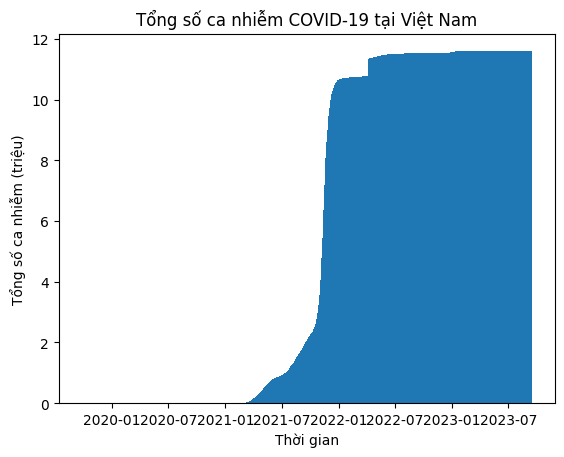

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số ca nhiễm theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_cases = vietnam_data['total_cases'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_cases, width=pd.DateOffset(months=8), align='center')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số ca nhiễm (triệu)')
ax.set_title('Tổng số ca nhiễm COVID-19 tại Việt Nam')
plt.show()

<ipython-input-58-b7b752738e1d>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('owid-covid-data.csv')


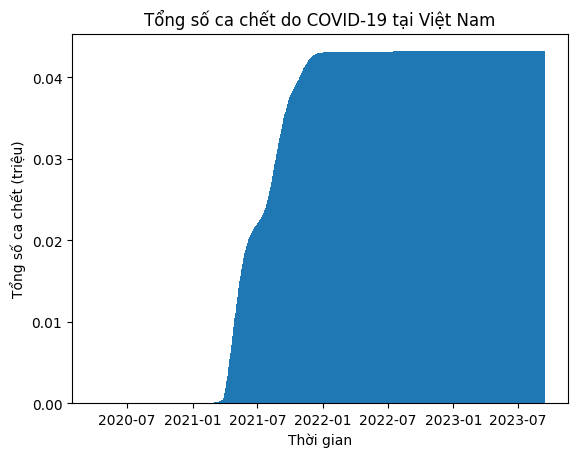

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số ca chết theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_deaths = vietnam_data['total_deaths'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_deaths, width=pd.DateOffset(months=8), align='center')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số ca chết (triệu)')
ax.set_title('Tổng số ca chết do COVID-19 tại Việt Nam')
plt.show()

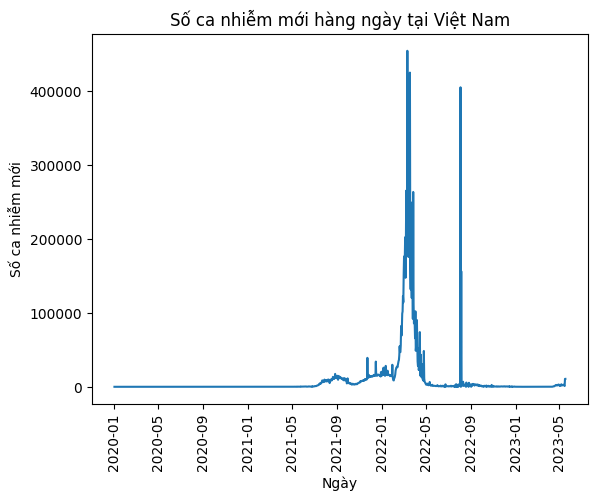

In [59]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới hàng ngày tại Việt Nam
plt.plot(data_vn['date'], data_vn['new_cases'])
plt.title('Số ca nhiễm mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.xticks(rotation=90)
plt.show()

<ipython-input-60-52a3526dd87d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_cases', data=data_vn, palette='Blues', label='Số ca nhiễm mới')
<ipython-input-60-52a3526dd87d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_deaths', data=data_vn, palette='Reds', label='Số ca tử vong mới')


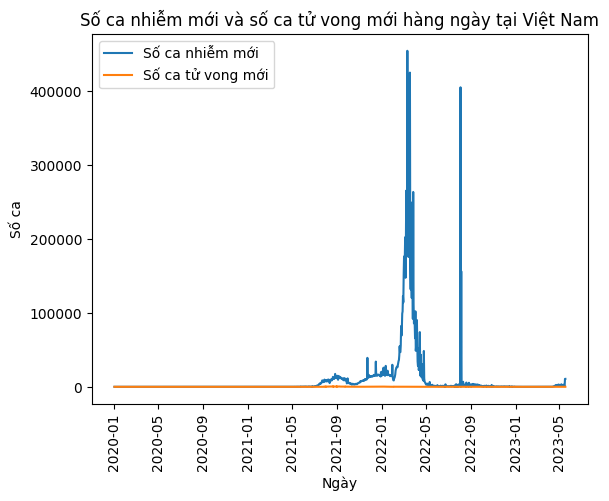

In [60]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam
sns.lineplot(x='date', y='new_cases', data=data_vn, palette='Blues', label='Số ca nhiễm mới')
sns.lineplot(x='date', y='new_deaths', data=data_vn, palette='Reds', label='Số ca tử vong mới')
plt.title('Số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.xticks(rotation=90)

# Định dạng trục x để chỉ hiển thị tháng và năm cách nhau 4 tháng
ax = plt.gca()
# ax.xaxis.set_major_locator(pd.DateOffset(months=4))

plt.legend()
plt.show()

In [61]:
# Thay thế các giá trị thiếu bằng giá trị 0
data_vn['total_deaths'].fillna(0, inplace=True)
data_vn['total_cases'].fillna(0, inplace=True)
data_vn['people_vaccinated'].fillna(0, inplace=True)

# Tính số ca hồi phục tại Việt Nam
total_recovered_vn = data_vn['total_cases'].max() - data_vn['total_deaths'].max()

print("Tổng số ca hồi phục tại Việt Nam là:", total_recovered_vn)

Tổng số ca hồi phục tại Việt Nam là: 11510000.385414416


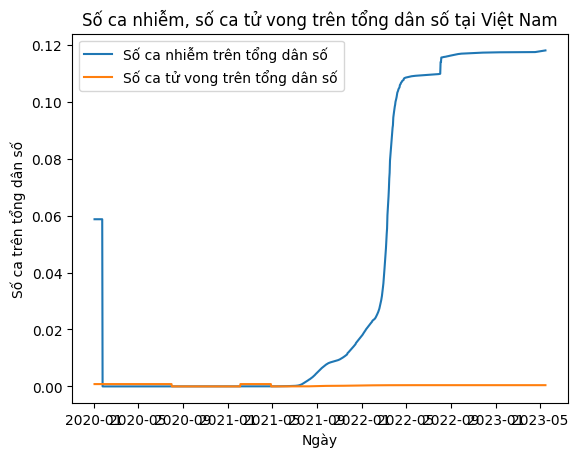

In [62]:
#Tính toán số ca nhiễm, số ca tử vong và số ca hồi phục trên tổng dân số và lưu trữ chúng trong cột mới trong bảng dữ liệu:
data_vn["cases_per_capita"] = data_vn["total_cases"] / data_vn["population"]
data_vn["deaths_per_capita"] = data_vn["total_deaths"] / data_vn["population"]

#Tạo biểu đồ sử dụng Matplotlib
import matplotlib.pyplot as plt

plt.plot(data_vn["date"], data_vn["cases_per_capita"], label="Số ca nhiễm trên tổng dân số")
plt.plot(data_vn["date"], data_vn["deaths_per_capita"], label="Số ca tử vong trên tổng dân số")

plt.title("Số ca nhiễm, số ca tử vong trên tổng dân số tại Việt Nam")
plt.xlabel("Ngày")
plt.ylabel("Số ca trên tổng dân số")
plt.legend()
plt.show()

<ipython-input-63-5fad4c71d02b>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('owid-covid-data.csv')


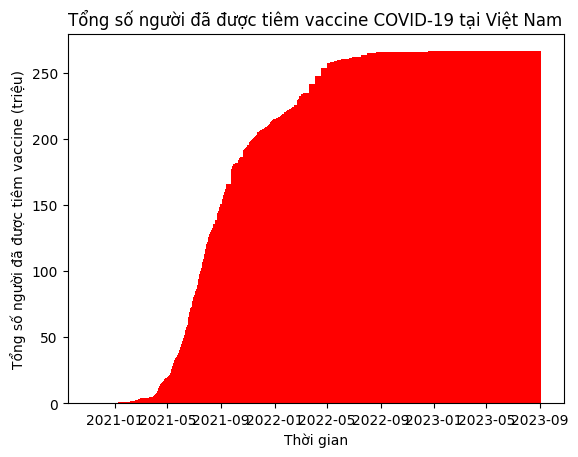

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số người đã được tiêm vaccine theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
total_vaccinations = vietnam_data['total_vaccinations'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, total_vaccinations, width=pd.DateOffset(months=8), align='center', color = 'red')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số người đã được tiêm vaccine (triệu)')
ax.set_title('Tổng số người đã được tiêm vaccine COVID-19 tại Việt Nam')
plt.show()

<ipython-input-64-00fd1cc3d6cf>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('owid-covid-data.csv')


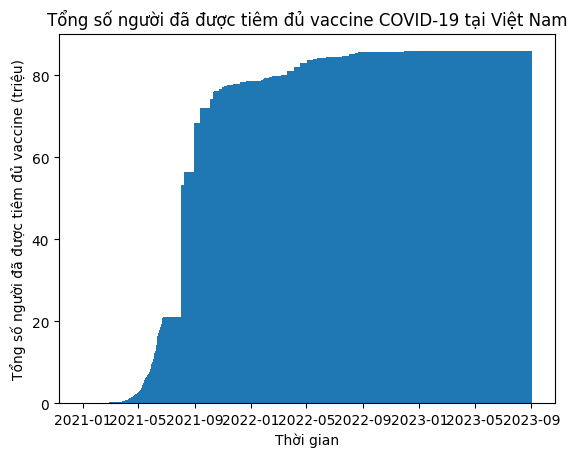

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location']=='Vietnam']

# Lấy thông tin về tổng số người đã được tiêm đủ vaccine theo thời gian
dates = pd.to_datetime(vietnam_data['date'])
people_fully_vaccinated = vietnam_data['people_fully_vaccinated'] / 1000000 # Chuyển đơn vị sang triệu

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(dates, people_fully_vaccinated, width=pd.DateOffset(months=8), align='center')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Tổng số người đã được tiêm đủ vaccine (triệu)')
ax.set_title('Tổng số người đã được tiêm đủ vaccine COVID-19 tại Việt Nam')
plt.show()

In [65]:
# Lọc ra các hàng liên quan đến Việt Nam
data_vn = data[data["location"] == "Vietnam"]

# Tính toán bình quân số lượng vaccine mỗi người được tiêm
average_vacc_per_person = data_vn["total_vaccinations"].max() / data_vn["people_vaccinated"].max()

print("Bình quân số lượng vaccine mỗi người được tiêm là:", round(average_vacc_per_person, 2))

Bình quân số lượng vaccine mỗi người được tiêm là: 2.95


<ipython-input-66-6831586a185e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["date"] = pd.to_datetime(data_vn["date"])
<ipython-input-66-6831586a185e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["vaccine_per_person"] = data_vn["total_vaccinations"] / data_vn["population"]


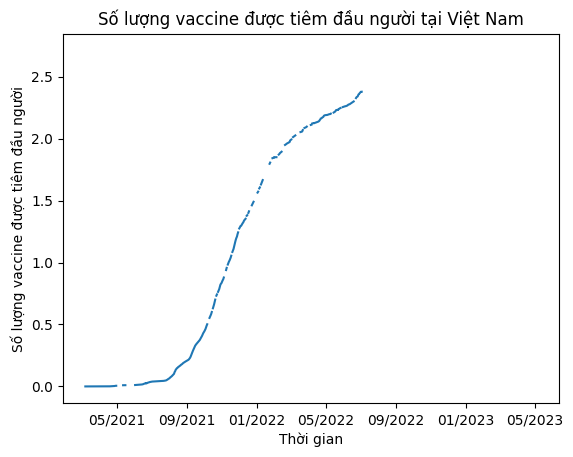

In [66]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

data_vn["date"] = pd.to_datetime(data_vn["date"])
# Số lượng vaccine được tiêm theo đầu người 
data_vn["vaccine_per_person"] = data_vn["total_vaccinations"] / data_vn["population"]

fig, ax = plt.subplots()

ax.plot(data_vn["date"], data_vn["vaccine_per_person"])
ax.set_title("Số lượng vaccine được tiêm đầu người tại Việt Nam")
ax.set_xlabel("Thời gian")
ax.set_ylabel("Số lượng vaccine được tiêm đầu người")

# Chỉnh xác trục hoành theo định dạng tháng và năm, cách nhau 4 tháng
month_locator = MonthLocator(interval=4)
date_formatter = DateFormatter('%m/%Y')
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(date_formatter)

plt.show()

In [67]:
####
# Tổng số ca nhiễm và số ca tử vong của mỗi quốc gia
data_total_cases = data.groupby("location")["total_cases"].max().sort_values(ascending=False)
data_total_deaths = data.groupby("location")["total_deaths"].max().sort_values(ascending=False)

# In ra 10 quốc gia có số ca nhiễm và số ca tử vong cao nhất
print("Top 10 quốc gia có số ca nhiễm cao nhất:")
print(data_total_cases.head(10))
print("Top 10 quốc gia có số ca tử vong cao nhất:")
print(data_total_deaths.head(10))

Top 10 quốc gia có số ca nhiễm cao nhất:
location
World                  766440032.0
High income            421618451.0
Asia                   297229145.0
Europe                 249319125.0
Upper middle income    243775512.0
European Union         184065400.0
North America          124169393.0
United States          103436829.0
China                   99256991.0
Lower middle income     97534145.0
Name: total_cases, dtype: float64
Top 10 quốc gia có số ca tử vong cao nhất:
location
World                  6932578.0
High income            2879224.0
Upper middle income    2658752.0
Europe                 2061428.0
Asia                   1632001.0
North America          1601383.0
South America          1352145.0
Lower middle income    1342727.0
European Union         1231494.0
United States          1127152.0
Name: total_deaths, dtype: float64


<ipython-input-68-2e6cfdd4db16>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


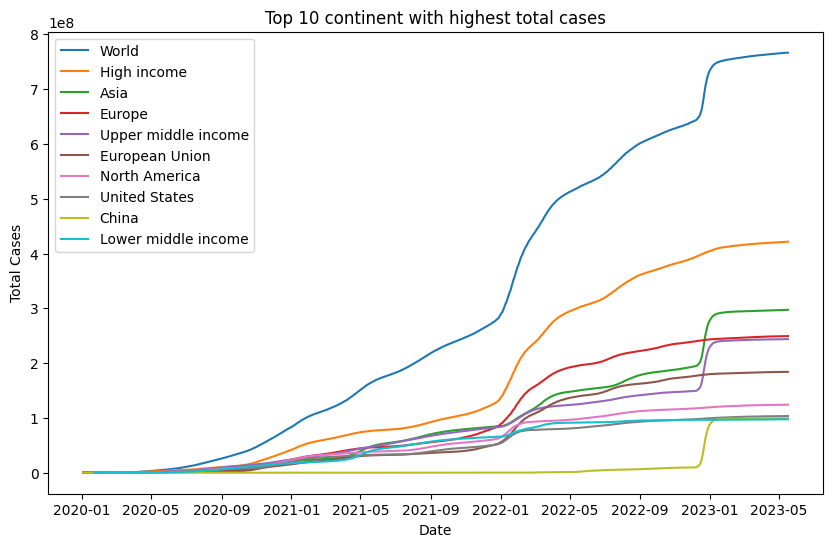

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')
df["date"] = pd.to_datetime(df["date"])
# Nhóm các quốc gia theo số ca nhiễm và lấy 10 quốc gia đầu tiên
top_10_countries = df.groupby('location')['total_cases'].max().nlargest(10).index.tolist()

# Lọc dữ liệu cho 10 quốc gia này và vẽ biểu đồ
df_top_10 = df[df['location'].isin(top_10_countries)]
fig,ax = plt.subplots(figsize=(10, 6))
for country in top_10_countries:
    data = df_top_10[df_top_10['location'] == country]
    ax.plot(data['date'], data['total_cases'], label=country)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
ax.set_title('Top 10 continent with highest total cases')
plt.show()

In [69]:
# Tỉ lệ tử vong của mỗi quốc gia
data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]
data_cfr = data.groupby("location")["case_fatality_rate"].max().sort_values(ascending=False)

# In ra 10 quốc gia có tỉ lệ tử vong caonhất
print("Top 10 quốc gia có tỉ lệ tử vong cao nhất:")
print(data_cfr.head(10))

Top 10 quốc gia có tỉ lệ tử vong cao nhất:
location
Lower middle income    0.126214
Name: case_fatality_rate, dtype: float64


<ipython-input-69-82b9e7141fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]


<ipython-input-70-45676f7dc96b>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


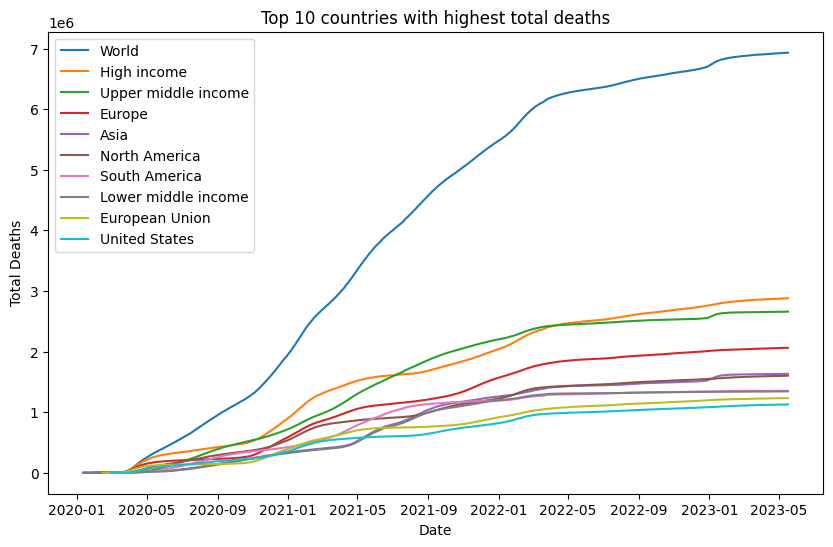

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')
df["date"] = pd.to_datetime(df["date"])
# Nhóm các quốc gia theo số ca tử vong và lấy 10 quốc gia đầu tiên
top_10_countries = df.groupby('location')['total_deaths'].max().nlargest(10).index.tolist()

# Lọc dữ liệu cho 10 quốc gia này và vẽ biểu đồ
df_top_10 = df[df['location'].isin(top_10_countries)]
fig,ax = plt.subplots(figsize=(10, 6))
for country in top_10_countries:
    data = df_top_10[df_top_10['location'] == country]
    ax.plot(data['date'], data['total_deaths'], label=country)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Total Deaths')
ax.set_title('Top 10 countries with highest total deaths')
plt.show()

In [71]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# Tính số ca nhiễm mới bằng cách lấy hiệu của số ca nhiễm của ngày hiện tại và ngày trước đó
df["new_cases"] = df.groupby("location")["total_cases"].diff()

# Tính tốc độ gia tăng của số ca nhiễm mới theo phần trăm
df["new_cases_pct_change"] = df.groupby("location")["new_cases"].pct_change() * 100

# Lấy bảng dữ liệu mới nhất
df_latest = df[df["date"] == df["date"].max()]

# Lấy 10 quốc gia có tốc độ gia tăng số ca nhiễm mới cao nhất
df_top_10 = df_latest.sort_values(by="new_cases_pct_change", ascending=False).head(10)

# Hiển thị top 10 quốc gia
print("Top 10 quốc gia tốc độ gia tăng số ca nhiễm mới cao nhất:")
print(df_top_10[["location", "new_cases_pct_change"]])

<ipython-input-71-90d27f62083e>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")


Top 10 quốc gia tốc độ gia tăng số ca nhiễm mới cao nhất:
                   location  new_cases_pct_change
16011                  Asia                   0.0
23406            Bangladesh                   0.0
125504                India                   0.0
158755  Lower middle income                   0.0
307746                World                   0.0
18478               Austria                   NaN
68962               Czechia                   NaN
87354                Europe                   NaN
88589        European Union                   NaN
102134              Germany                   NaN


In [72]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# Lọc bảng dữ liệu theo các cột cần thiết và sắp xếp theo quốc gia và ngày
df = df[["location", "date", "new_cases"]]
df = df.sort_values(by=["location", "date"])

# Tính số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia
df["new_cases_avg"] = df.groupby("location")["new_cases"].rolling(window=7).mean().reset_index(0, drop=True)

# Lấy bảng dữ liệu mới nhất
df_latest = df[df["date"] == df["date"].max()]

# Hiển thị số ca nhiễm trung bình 7 ngày gần nhất của mỗi quc gia
print("Số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia:")
print(df_latest[["location", "new_cases_avg"]])

<ipython-input-72-f801312bc7dc>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")


Số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia:
                   location  new_cases_avg
16011                  Asia            NaN
18478               Austria            NaN
23406            Bangladesh            NaN
68962               Czechia            NaN
87354                Europe            NaN
88589        European Union            NaN
102134              Germany            NaN
105831               Greece            NaN
119376          High income            NaN
125504                India            NaN
134125                Italy            NaN
146439           Kyrgyzstan            NaN
158755  Lower middle income            NaN
164478             Malaysia            NaN
247529               Serbia            NaN
259843        South America            NaN
296747  Upper middle income            NaN
297982              Uruguay            NaN
307746                World            NaN


<ipython-input-73-d8d44c4153dc>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


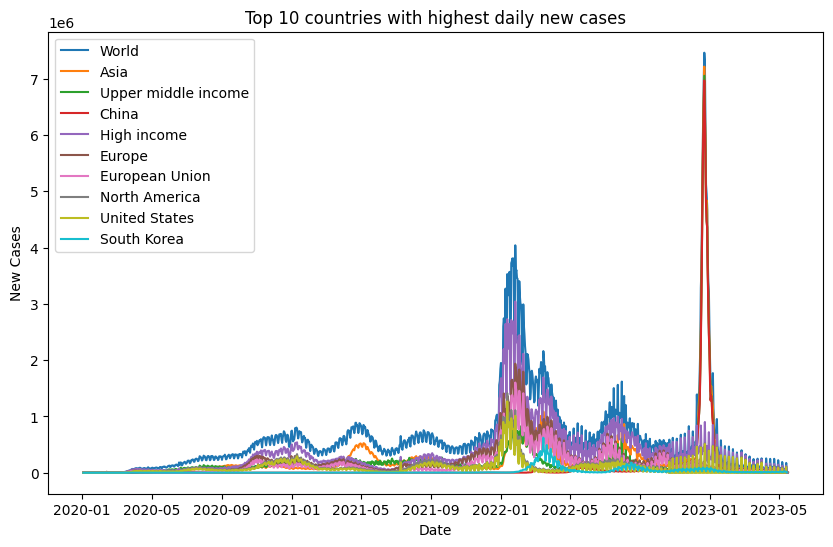

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')
df["date"] = pd.to_datetime(df["date"])
# Nhóm các quốc gia theo số ca nhiễm mới và lấy 10 quốc gia đầu tiên
top_10_countries = df.groupby('location')['new_cases'].max().nlargest(10).index.tolist()

# Lọc dữ liệu cho 10 quốc gia này và vẽ biểu đồ
df_top_10 = df[df['location'].isin(top_10_countries)]
fig, ax = plt.subplots(figsize=(10, 6))
for country in top_10_countries:
    data = df_top_10[df_top_10['location'] == country]
    ax.plot(data['date'], data['new_cases'], label=country)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
ax.set_title('Top 10 countries with highest daily new cases')
plt.show()

In [74]:
import pandas as pd

# Tải tập dữ liệu COVID-19 từ Our World in Data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lọc dữ liệu để chỉ lấy thông tin về số ca nhiễm mới của mỗi quốc gia
df_cases = df[df['new_cases'].notna()]


# Tính toán số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia
df_cases['7_day_avg'] = df_cases.groupby('location')['new_cases'].rolling(7).mean().reset_index(0, drop=True)

# Sắp xếp các quốc gia theo số ca nhiễm trung bình 7 ngày gần nhất giảm dần và chọn 10 quốc gia có số ca nhiễm trung bình 7 ngày gần nhất nhiều nhất, chúng ta có thể sử dụng các lệnh sau:


# Sắp xếp các quốc gia theo số ca nhiễm trung bình 7 ngày gần nhất giảm dần
df_sorted = df_cases.sort_values(by=['7_day_avg'], ascending=False)

# Chọn 10 quốc gia có số ca nhiễm trung bình 7 ngày gần nhất nhiều nhất
top_countries = df_sorted.groupby('location').first().sort_values(by=['7_day_avg'], ascending=False).head(10)

print(top_countries[['iso_code', '7_day_avg']])


<ipython-input-74-0fc9ae7be6b8>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
<ipython-input-74-0fc9ae7be6b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases['7_day_avg'] = df_cases.groupby('location')['new_cases'].rolling(7).mean().reset_index(0, drop=True)


                     iso_code     7_day_avg
location                                   
World                OWID_WRL  6.410667e+06
Asia                 OWID_ASI  6.109943e+06
Upper middle income  OWID_UMC  5.952585e+06
China                     CHN  5.882129e+06
High income          OWID_HIC  2.354639e+06
Europe               OWID_EUR  1.566684e+06
European Union       OWID_EUN  1.263880e+06
North America        OWID_NAM  9.426073e+05
United States             USA  8.097353e+05
Lower middle income  OWID_LMC  4.599889e+05


In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lấy dữ liệu cho quốc gia Việt Nam
data_vn = data[data['iso_code'] == 'VNM']

# Chọn các đặc trưng quan tâm
features = ['total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']

# Xóa các dòng chứa giá trị thiếu
data_vn.dropna(subset=features, inplace=True)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(data_vn[features], data_vn['total_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm trong tương lai với tập kiểm tra
predictions = model.predict(test_data)

# Đánh giá hiệu suất mô hình bằng RMSE vàR-squared
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
print('RMSE:', rmse)
print('R-squared:', r_squared)

# Dự đoán số ca nhiễm hoặc số ca tử vong trong tương lai từ các đặc trưng mới
new_features = np.array([1000, 20, 50, 1, 5000]).reshape(1, -1)
new_predictions = model.predict(new_features)
print('New predictions:', new_predictions)

<ipython-input-75-3f992bc858e2>:8: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


RMSE: 3.861321494006327e-09
R-squared: 1.0
New predictions: [1000.00000001]


<ipython-input-75-3f992bc858e2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn.dropna(subset=features, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lấy dữ liệu cho quốc gia Trung Quốc
china_data = data.loc[data['iso_code'] == 'CHN']
# Chọn các đặc trưng quan trọng
features = ['new_cases', 'new_deaths', 'new_vaccinations']

# Xóa các dòng chứa giá trị thiếu
china_data.dropna(subset=features, inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(china_data[features], china_data['new_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm mới từ tập kiểm tra
predictions = model.predict(test_data)

# In ra các giá trị dự đoán và giá trị thực tế từ tập kiểm tra
for i in range(len(predictions)):
    print('Predicted:', predictions[i], '\tActual:', test_labels.reset_index(drop=True)[i])

<ipython-input-76-0109dbd8a61b>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
<ipython-input-76-0109dbd8a61b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data.dropna(subset=features, inplace=True)


Predicted: 1482.9999999999834 	Actual: 1483.0
Predicted: 37764.999999999774 	Actual: 37765.0
Predicted: 35861.9999999998 	Actual: 35862.0
Predicted: 8023.999999999941 	Actual: 8024.0
Predicted: 83.00000000021724 	Actual: 83.0
Predicted: 277003.9999999998 	Actual: 277004.0
Predicted: 25081.99999999978 	Actual: 25082.0
Predicted: 9390.999999999976 	Actual: 9391.0
Predicted: 212.99999999978394 	Actual: 213.0
Predicted: 101.00000000079658 	Actual: 101.0
Predicted: 288.0000000005201 	Actual: 288.0
Predicted: 102.00000000043386 	Actual: 102.0
Predicted: 73343.99999999981 	Actual: 73344.0
Predicted: 15717.00000000002 	Actual: 15717.0
Predicted: 41619.999999999774 	Actual: 41620.0
Predicted: 558.0000000007434 	Actual: 558.0
Predicted: 234.000000000467 	Actual: 234.0
Predicted: 45011.9999999998 	Actual: 45012.0
Predicted: 37.99999999987402 	Actual: 38.0
Predicted: 13947.000000000038 	Actual: 13947.0
Predicted: 58.00000000020354 	Actual: 58.0
Predicted: 2825.999999999896 	Actual: 2826.0
Predicte

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
df_vn = df[df['location'] == 'Vietnam']


# Chọn các cột cần thiết và đổi tên cột
df_vn = df_vn[['date', 'new_cases', 'total_vaccinations']]
df_vn.columns = ['Date', 'New Cases', 'Vaccinations']

# Tạo các cột với dữ liệu trễ
df_vn['New Cases Lag 1'] = df_vn['New Cases'].shift(1)
df_vn['Vaccinations Lag 1'] = df_vn['Vaccinations'].shift(1)

# Xóa các dòng với giá trị null
df_vn = df_vn.dropna()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(df_vn) * 0.8)
train_data = df_vn[:train_size]
test_data = df_vn[train_size:]

# Xây dựng mô hình hồi quy tuyến tính đơn giản
X_train = train_data[['New Cases Lag 1', 'Vaccinations Lag 1']]
y_train = train_data['New Cases']
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán số ca nhiễm mới củaViệt Nam trong 7 ngày tiếp theo dựa trên số ca nhiễm và lượng vaccine của 7 ngày trước đó
X_test = test_data[['New Cases Lag 1', 'Vaccinations Lag 1']]
y_test = test_data['New Cases']
y_pred = model.predict(X_test)

# Hiển thị kết quả dự đoán và so sánh với dữ liệu thực tế
predictions = pd.DataFrame({'Date': test_data['Date'], 'Predicted New Cases': y_pred, 'Actual New Cases': y_test})
print(predictions)

# Dự đoán số ca nhiễm mới của Việt Nam trong 7 ngày tiếp theo
last_7_days = df_vn.tail(7)
last_7_days = last_7_days[['New Cases', 'Vaccinations']]
next_week = []
for i in range(7):
    X_new = np.array(last_7_days.iloc[i]).reshape(1, -1)
    y_new = model.predict(X_new)
    next_week.append(y_new[0])
predictions_next_week = pd.DataFrame({'Date': pd.date_range(start=last_7_days.index[-1], periods=7, freq='D'),
                                      'Predicted New Cases': next_week})
print(predictions_next_week)

<ipython-input-77-0c030700925b>:6: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


             Date  Predicted New Cases  Actual New Cases
303644  3/19/2022        211980.149328          424729.0
303645  3/20/2022        467059.967180          166207.0
303646  3/21/2022        182869.555281          131713.0
303647  3/22/2022        144951.247735          249153.0
303651  3/26/2022        177705.959650          158305.0
...           ...                  ...               ...
303742  6/25/2022          3902.088790             657.0
303743  6/26/2022           970.281717             557.0
303744  6/27/2022           861.318274             637.0
303747  6/30/2022          1110.402433             839.0
303750   7/3/2022          1063.014389             512.0

[66 rows x 3 columns]
                           Date  Predicted New Cases
0 1970-01-01 00:00:00.000303750           822.126148
1 1970-01-02 00:00:00.000303750          3902.088790
2 1970-01-03 00:00:00.000303750           970.281717
3 1970-01-04 00:00:00.000303750           861.318274
4 1970-01-05 00:00:00.000303

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhập dữ liệu từ tập tin CSV vào dataframe
df = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [79]:
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

# Hiển thị 5 hàng đầu tiên của dataframe sau khi loại bỏ các cột không cần thiết
print(df.head())

  Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0  ...   209322  209340  209358  209362  209369   
1        0        0        0  ...   334391  334408  334408  334427  334427   
2        0        0        0  ...   271441  271448  271463  271469  271469   
3        0        0        0  ...    47866   47875   47875   47875   47875   
4        0        0        0  ...   105255  105277  105277  105277  105277   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209

In [80]:
# Hiển thị thông tin về số dòng và số cột trong dataframe
print("Kích thước của dataframe: ", df.shape)

Kích thước của dataframe:  (289, 1145)


In [81]:
# Hiển thị thông tin chi tiết về các cột trong dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1145 entries, Province/State to 3/9/23
dtypes: int64(1143), object(2)
memory usage: 2.5+ MB
None


<ipython-input-86-1eae2aa60200>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


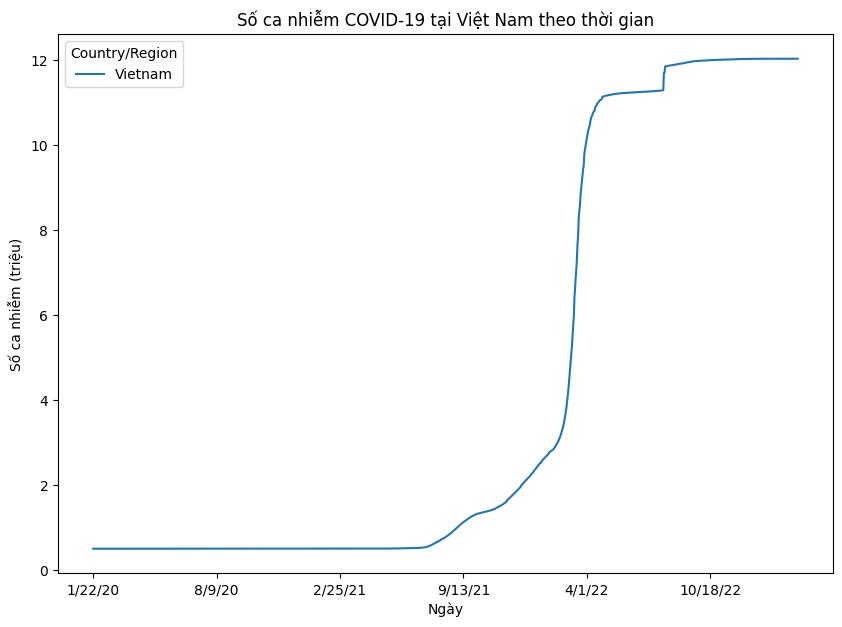

In [86]:
# Tạo dataframe mới chứa thông tin số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 0.5 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 0.5

# Vẽ biểu đồ đường (line chart) thể hiện số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn_per_million.plot(figsize=(10, 7))
plt.title('Số ca nhiễm COVID-19 tại Việt Nam theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm (triệu)')
plt.show()

<ipython-input-89-4e5e940e95fe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


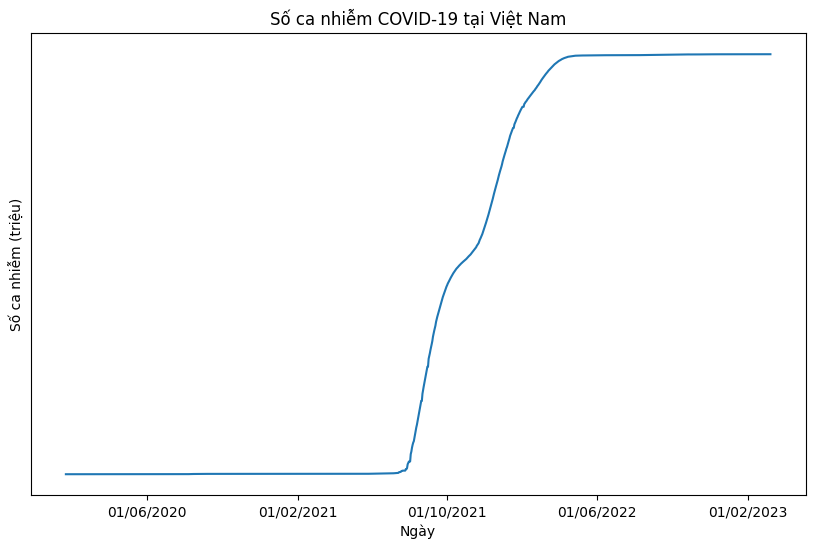

In [89]:
# Tạo dataframe mới chứa thông tin số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 2 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 1

# Chuyển đđổi ngày thành ngày, tháng và năm
df_vn_per_million.index = pd.to_datetime(df_vn_per_million.index)

# Vẽ biểu đồ đường (line chart) thể hiện số ca nhiễm COVID-19 theo thời gian tại Việt Nam
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vn_per_million.index, df_vn_per_million.values)
ax.set_title('Số ca nhiễm COVID-19 tại Việt Nam')
ax.set_xlabel('Ngày')
ax.set_ylabel('Số ca nhiễm (triệu)')
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

<ipython-input-90-249f30882e93>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


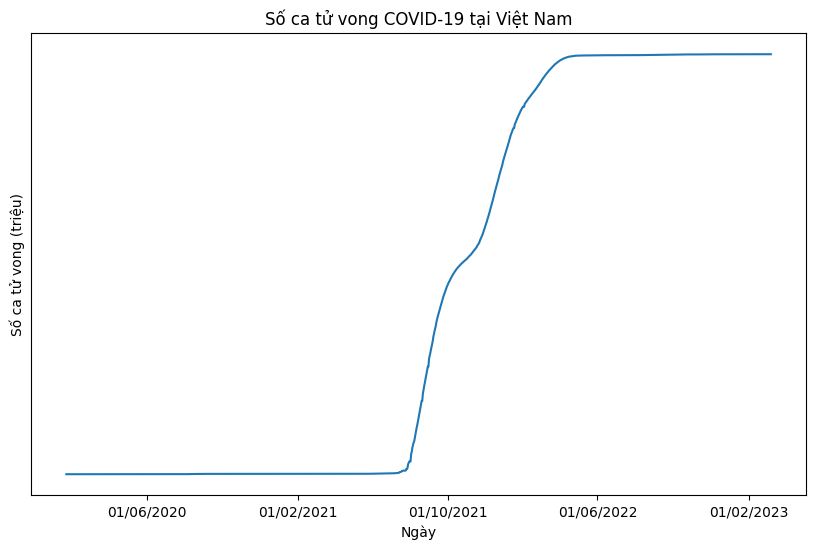

In [90]:
# Tạo dataframe mới chứa thông tin số ca tử vong COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 1 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 1

# Chuyển đổi ngày thành ngày, tháng và năm
df_vn_per_million.index = pd.to_datetime(df_vn_per_million.index)

# Vẽ biểu đồ đường (line chart) thể hiện số ca tử vong COVID-19 theo thời gian tại Việt Nam
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vn_per_million.index, df_vn_per_million.values)
ax.set_title('Số ca tử vong COVID-19 tại Việt Nam')
ax.set_xlabel('Ngày')
ax.set_ylabel('Số ca tử vong (triệu)')
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('/content/time_series_covid19_recovered_global.csv')
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

In [92]:
# Lấy thông tin về số ca hồi phục tại Việt Nam
vn_df = df[df['Country/Region'] == 'Vietnam']
vn_recovered = vn_df.iloc[:, 4:].sum(axis=0)
# Chia số lượng ca hồi phục cho 1 triệu
vn_recovered_per_million = vn_recovered / 1000000

<ipython-input-93-9fc19bbc5969>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


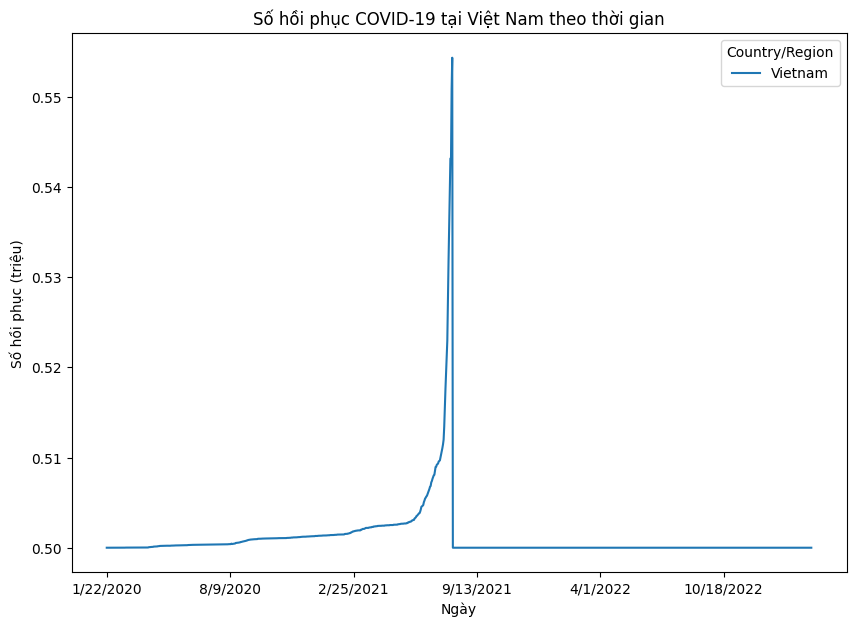

In [93]:
# Tạo dataframe mới chứa thông tin số ca hồi phục COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 0.5 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 0.5

# Vẽ biểu đồ đường (line chart) thể hiện số hồi phục COVID-19 theo thời gian tại Việt Nam
df_vn_per_million.plot(figsize=(10, 7))
plt.title('Số hồi phục COVID-19 tại Việt Nam theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số hồi phục (triệu)')
plt.show()

In [94]:
import pandas as pd

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_confirmed = pd.read_csv(url_confirmed)
df_recovered = pd.read_csv(url_recovered)
df_deaths = pd.read_csv(url_deaths)
# Biến đổi cột ngày thành các hàng và đổi tên các cột
df_confirmed_melted = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
df_recovered_melted = df_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')
df_deaths_melted = df_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')

# Gộp các DataFrame lại với nhau bằng cách sử dụng phương thức merge()
df_merged = pd.merge(df_confirmed_melted, df_recovered_melted, how='left', on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
df_merged = pd.merge(df_merged, df_deaths_melted, how='left', on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
print(df_merged.head(5))


  Province/State Country/Region       Lat       Long     Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0   
1            NaN        Albania  41.15330  20.168300  1/22/20          0   
2            NaN        Algeria  28.03390   1.659600  1/22/20          0   
3            NaN        Andorra  42.50630   1.521800  1/22/20          0   
4            NaN         Angola -11.20270  17.873900  1/22/20          0   

   Recovered  Deaths  
0        0.0       0  
1        0.0       0  
2        0.0       0  
3        0.0       0  
4        0.0       0  


In [95]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
print(df_merged.tail(5))


       Province/State        Country/Region        Lat        Long       Date  \
330322            NaN    West Bank and Gaza  31.952200   35.233200 2023-03-09   
330323            NaN  Winter Olympics 2022  39.904200  116.407400 2023-03-09   
330324            NaN                 Yemen  15.552727   48.516388 2023-03-09   
330325            NaN                Zambia -13.133897   27.849332 2023-03-09   
330326            NaN              Zimbabwe -19.015438   29.154857 2023-03-09   

        Confirmed  Recovered  Deaths  
330322     703228        0.0    5708  
330323        535        0.0       0  
330324      11945        0.0    2159  
330325     343135        0.0    4057  
330326     264276        0.0    5671  


In [96]:
# Loại bỏ các cột không cần thiết
df_merged = df_merged.drop(['Lat', 'Long'], axis=1)
df_merged.head(5) 

,Province/State,Country/Region,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,2020-01-22,0,0.0,0
1,NaN,Albania,2020-01-22,0,0.0,0
2,NaN,Algeria,2020-01-22,0,0.0,0
3,NaN,Andorra,2020-01-22,0,0.0,0
4,NaN,Angola,2020-01-22,0,0.0,0


In [97]:
#Active cases 
df_merged['Active_case'] = df_merged['Confirmed'] - (df_merged['Recovered'] + df_merged['Deaths'])
df_merged.tail(5)

,Province/State,Country/Region,Date,Confirmed,Recovered,Deaths,Active_case
330322,NaN,West Bank and Gaza,2023-03-09,703228,0.0,5708,697520.0
330323,NaN,Winter Olympics 2022,2023-03-09,535,0.0,0,535.0
330324,NaN,Yemen,2023-03-09,11945,0.0,2159,9786.0
330325,NaN,Zambia,2023-03-09,343135,0.0,4057,339078.0
330326,NaN,Zimbabwe,2023-03-09,264276,0.0,5671,258605.0


In [98]:
statewise = pd.pivot_table(df_merged, values = ['Confirmed','Deaths','Recovered'],index = 'Country/Region', aggfunc = max )

In [99]:
statewise['Recovery Rate'] = statewise['Recovered']*100/statewise['Confirmed']

In [100]:
statewise['Mortality Rate'] = statewise['Deaths']*100/statewise['Confirmed']

In [101]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [102]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
Country/Region,,,,,
US,103802702,1123836,6298082.000000,6.067358,1.082665
India,44690738,530779,30974748.000000,69.309099,1.187671
France,38618509,161512,342647.000000,0.887261,0.418224
Germany,38249060,168935,3659260.000000,9.566928,0.441671
Brazil,37081209,699276,17771228.000000,47.925158,1.885796
Japan,33320438,72997,852451.000000,2.558343,0.219076
"Korea, South",30615522,34093,180719.000000,0.590286,0.111359
Italy,25603510,188322,4144608.000000,16.187656,0.735532
United Kingdom,24425309,219948,8322.000000,0.034071,0.900492


In [103]:
#Top 10 active cases states
top_10_active_cases = df_merged.groupby(by = 'Country/Region').max()[['Active_case','Date']]
print(top_10_active_cases.head(5))

                Active_case       Date
Country/Region                        
Afghanistan        201555.0 2023-03-09
Albania            330859.0 2023-03-09
Algeria            264615.0 2023-03-09
Andorra             47725.0 2023-03-09
Angola             103355.0 2023-03-09


<ipython-input-103-7ff928b9a757>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_10_active_cases = df_merged.groupby(by = 'Country/Region').max()[['Active_case','Date']]


In [104]:
# Sắp xếp các quốc gia theo số ca tích cực giảm dần
top_countries_region = df_merged.sort_values(by='Active_case', ascending=False)

# Hiển thị top 10 quốc gia theo thứ tự giảm dần của số ca tích cực
print(top_countries_region[['Country/Region', 'Active_case']].head(10))

       Country/Region  Active_case
330298             US  102678866.0
330009             US  102632525.0
329720             US  102568394.0
329431             US  102533358.0
328853             US  102528665.0
328564             US  102526525.0
329142             US  102524841.0
328275             US  102468099.0
327986             US  102412975.0
327697             US  102323538.0


<ipython-input-105-916432f7ca18>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_deaths = df_merged.groupby(by='Country/Region').sum()['Deaths'].sort_values(ascending=False)


Country/Region
US                713877215
Brazil            488181000
India             364921237
Mexico            241085189
Russia            220983590
Peru              170749849
United Kingdom    160836677
Italy             127936784
France            113410357
Colombia          100671637
Name: Deaths, dtype: int64


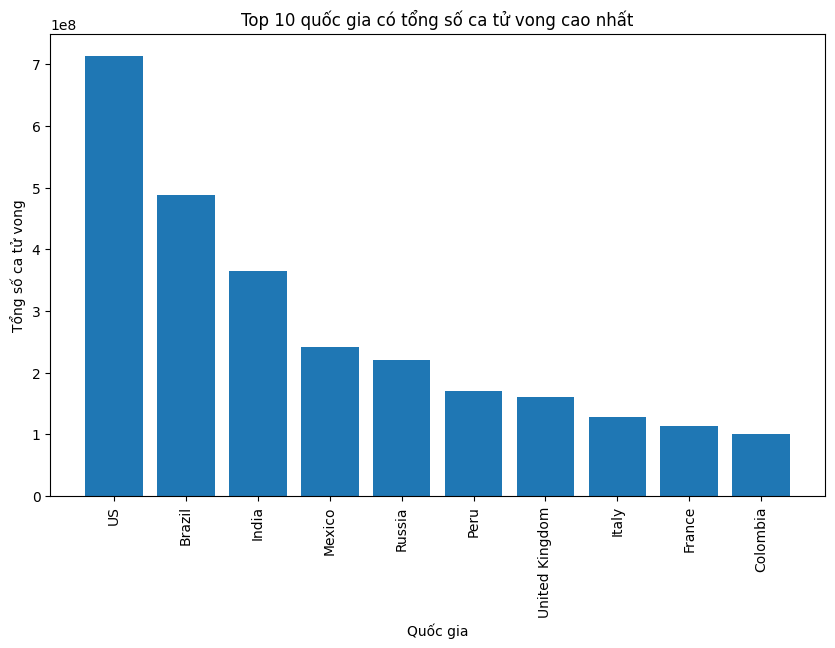

In [105]:
# Tính tổng số ca tử vong của mỗi quốc gia
top_deaths = df_merged.groupby(by='Country/Region').sum()['Deaths'].sort_values(ascending=False)

# Hiển thị top 10 quốc gia có tổng số ca tử vong cao nhất
print(top_deaths.head(10))

# Vẽ biểu đồ cột thể hiện top 10 quốc gia có tổng số ca tử vong cao nhất
plt.figure(figsize=(10, 6))
plt.bar(top_deaths.head(10).index, top_deaths.head(10).values)
plt.xticks(rotation=90)
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.title('Top 10 quốc gia có tổng số ca tử vong cao nhất')
plt.show()

<ipython-input-106-97bf209e9ef2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Date'] = pd.to_datetime(country_data['Date'])
<ipython-input-106-97bf209e9ef2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Date'] = pd.to_datetime(country_data['Date'])
<ipython-input-106-97bf209e9ef2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

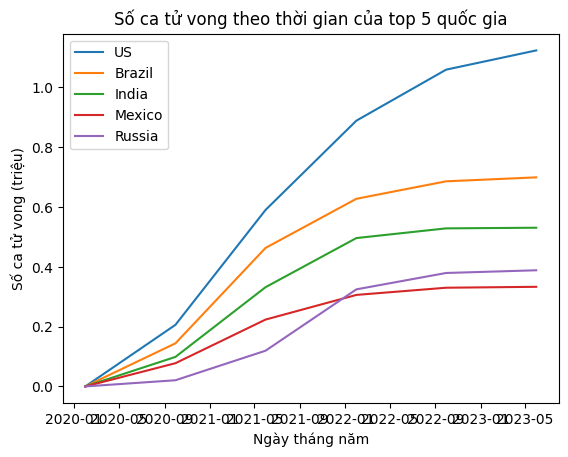

In [106]:
# Group dữ liệu theo quốc gia và tính tổng số ca tử vong
deaths_by_country = df_merged.groupby('Country/Region')['Deaths'].sum()

# Sắp xếp theo thứ tự giảm dần và lấy top 5 quốc gia
top5_deaths = deaths_by_country.sort_values(ascending=False).head(5)

# Lọc dữ liệu của top 5 quốc gia
top5_data = df_merged[df_merged['Country/Region'].isin(top5_deaths.index)]

# Group dữ liệu củatop 5 quốc gia và tính tổng số ca tử vong theo ngày
deaths_by_date = top5_data.groupby('Date')['Deaths'].sum()

# Chuyển đổi đơn vị tính số ca tử vong từ số lượng sang triệu
deaths_by_date = deaths_by_date / 1000000

# Tạo đối tượng Figure và Axes của biểu đồ
fig, ax = plt.subplots()

# Vẽ biểu đồ đường line cho mỗi quốc gia
for country in top5_deaths.index:
    country_data = top5_data[top5_data['Country/Region'] == country]
    country_data['Date'] = pd.to_datetime(country_data['Date'])
    country_data = country_data.set_index('Date')
    country_data = country_data.resample('8M').last()
    ax.plot(country_data.index, country_data['Deaths'] / 1000000, label=country)

# Đặt tiêu đề và nhãn cho biểu đồ
ax.set_title('Số ca tử vong theo thời gian của top 5 quốc gia')
ax.set_xlabel('Ngày tháng năm')
ax.set_ylabel('Số ca tử vong (triệu)')
ax.legend()

# Hiển thị biểu đồplt.show()

In [107]:
import pandas as pd

# Load data
df = pd.read_csv('/content/owid-covid-data.csv')

# Calculate the incidence rate (number of cases per 100,000 population)
df['incidence_rate'] = df['total_cases'] / df['population'] * 100000

# Select the relevant features for clustering
X = df[['total_cases', 'incidence_rate']].dropna()


<ipython-input-107-786119fef48e>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/owid-covid-data.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


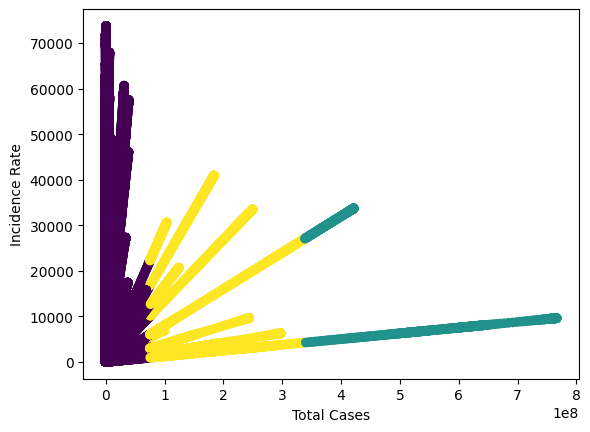

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Visualize the results with scatter plot
plt.scatter(X['total_cases'], X['incidence_rate'], c=kmeans.labels_)
plt.xlabel('Total Cases')
plt.ylabel('Incidence Rate')
plt.show()

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Assign column names
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Select the relevant features for clustering
X = iris[['petal_length', 'petal_width']]

# Convert dataframe tonumpy array
X = np.array(X)

In [110]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


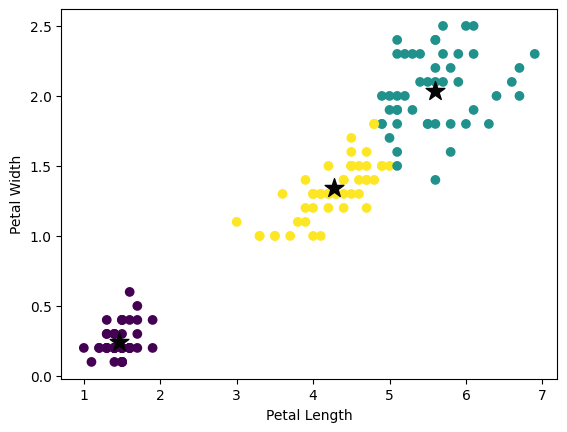

In [111]:
# Visualize the results with scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [112]:
import pandas as pd
from textblob import TextBlob

# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('/content/owid-covid-data.csv')

# Lấy các trường dữ liệu liên quan đến Covid-19
data = df[['location', 'date', 'total_cases', 'total_deaths', 'population']]

# Tạo một trường mới chứa các cảm nhận của người dùng về Covid-19
data['sentiment'] = ""

# Phân tích tình cảm cho mỗi quốc gia và lưu kết quả vào trường sentiment
for i, row in data.iterrows():
    # Tạo một đoạn văn bản chứa thông tin về Covid-19 của quốc gia đó
    text = f"Total cases: {row['total_cases']}, Total deaths: {row['total_deaths']}, Population: {row['population']}"
    # Phân tích tình cảm của đoạn văn bản sử dụng TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    # Xác định tình cảm của đoạn văn bản và lưu vào trường sentiment
    if sentiment > 0:
        data.at[i, 'sentiment'] = "positive"
    elif sentiment < 0:
        data.at[i, 'sentiment'] = "negative"
    else:
        data.at[i, 'sentiment'] = "neutral" 

# Hiển thị dữ liệu đã phân tích tình cảm
print(data)

<ipython-input-112-18cc10b68f4b>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/owid-covid-data.csv')
<ipython-input-112-18cc10b68f4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = ""


           location       date  total_cases  total_deaths  population  \
0       Afghanistan   1/3/2020          NaN           NaN    41128772   
1       Afghanistan   1/4/2020          NaN           NaN    41128772   
2       Afghanistan   1/5/2020          NaN           NaN    41128772   
3       Afghanistan   1/6/2020          NaN           NaN    41128772   
4       Afghanistan   1/7/2020          NaN           NaN    41128772   
...             ...        ...          ...           ...         ...   
311363     Zimbabwe  5/13/2023     264821.0        5690.0    16320539   
311364     Zimbabwe  5/14/2023     264841.0        5690.0    16320539   
311365     Zimbabwe  5/15/2023     264848.0        5690.0    16320539   
311366     Zimbabwe  5/16/2023     264848.0        5690.0    16320539   
311367     Zimbabwe  5/17/2023     264848.0        5690.0    16320539   

       sentiment  
0        neutral  
1        neutral  
2        neutral  
3        neutral  
4        neutral  
...      

<ipython-input-116-d5c6ba7f87a2>:8: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('owid-covid-data.csv')


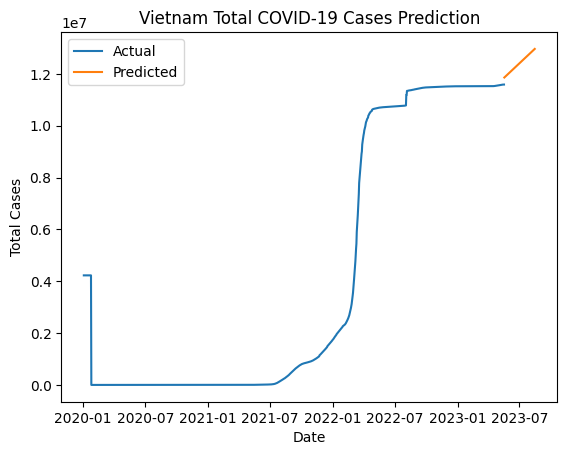

In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Bước 1: Thu thập và chuẩn bị dữ liệu
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam'][['date', 'total_cases']]
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])
vietnam_data.set_index('date', inplace=True)

train_data = vietnam_data[:-30]
test_data = vietnam_data[-30:]

# Replace NaN values with mean value
mean_value = vietnam_data['total_cases'].mean()
vietnam_data['total_cases'].fillna(mean_value, inplace=True)

# Bước 2: Xây dựng mô hình hồi quy tuyến tính
X_train = np.array(range(len(train_data)))[:, np.newaxis]
y_train = train_data['total_cases'].values
X_test = np.array(range(len(train_data), len(train_data)+len(test_data)))[:, np.newaxis]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Bước 3: Dự đoán số ca nhiễm trong 3 tháng tới
n_days = 90
next_days = pd.date_range(start=vietnam_data.index[-1]+timedelta(days=1),end=vietnam_data.index[-1]+timedelta(days=n_days))
X_next_days =np.array(range(len(vietnam_data), len(vietnam_data)+n_days))[:, np.newaxis]
predicted_cases = regressor.predict(X_next_days)
predicted_data = pd.DataFrame({'date': next_days, 'total_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

# Bước 4: Vẽ biểu đồ từ mô hình dự đoán
plt.plot(vietnam_data.index, vietnam_data['total_cases'], label='Actual')
plt.plot(predicted_data.index, predicted_data['total_cases'], label='Predicted')
plt.title('Vietnam Total COVID-19 Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()